In [42]:
import pandas as pd
import rpy2.robjects as robjects
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'IPAgothic'

In [3]:
robj = robjects.r['load']('./data/.RData')

In [4]:
for row in robj:
    print(row)

.Random.seed
data.cum.core30
data.cum.core30.2
data.cum.return
data.cum.return2
data.cum.train
data.cum.train.2
data.log.core30
data.log.return
data.log.return2
data.price
Date
label
price4
return4
sample1
sample2
X.price
X.return
Y.price
Y.return
yindex


In [8]:
data = pd.DataFrame(np.array([robjects.r['X.return'], robjects.r['Y.return']]).T, columns=['return_x', 'return_y'])

Text(0.5,1,'Return_y')

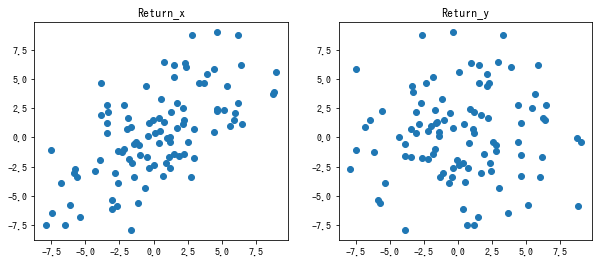

In [21]:
# xの散布図
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(x=data.loc[0:98, 'return_x'], y=data.loc[1:99, 'return_x'])
ax[0].set_title('Return_x')
ax[1].scatter(x=data.loc[0:98, 'return_y'], y=data.loc[1:99, 'return_y'])
ax[1].set_title('Return_y')

In [29]:
# 1つシフトしたデータとマージ
merge = data.merge(data.shift(1), suffixes=('_1', '_2'), left_index=True, right_index=True)
# 相関係数行列
merge.corr()

,return_x_1,return_y_1,return_x_2,return_y_2
return_x_1,1.000000,0.084384,0.635370,0.084355
return_y_1,0.084384,1.000000,0.117742,0.023483
return_x_2,0.635370,0.117742,1.000000,0.085837
return_y_2,0.084355,0.023483,0.085837,1.000000


In [43]:
help(sm.tsa.stattools.acf)

Help on function acf in module statsmodels.tsa.stattools:

acf(x, unbiased=False, nlags=40, qstat=False, fft=False, alpha=None, missing='none')
    Autocorrelation function for 1d arrays.
    
    Parameters
    ----------
    x : array
       Time series data
    unbiased : bool
       If True, then denominators for autocovariance are n-k, otherwise n
    nlags: int, optional
        Number of lags to return autocorrelation for.
    qstat : bool, optional
        If True, returns the Ljung-Box q statistic for each autocorrelation
        coefficient.  See q_stat for more information.
    fft : bool, optional
        If True, computes the ACF via FFT.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where the standard deviation is computed according to
        Bartlett's formula.
    missing : str, optional
        A string in ['none', '

In [44]:
# 自己相関関数の算出
acf = sm.tsa.stattools.acf(merge['return_x_1'], nlags=20, qstat=True, alpha=.05)

In [45]:
# 自己相関係数の値
acf[0]

array([ 1.        ,  0.63097735,  0.51663365,  0.44953328,  0.32406794,
        0.2945293 ,  0.28604115,  0.15597257,  0.05928554,  0.10331542,
        0.13398259,  0.07357625,  0.11553765,  0.05152195, -0.08725323,
        0.02001354, -0.03168261, -0.01431162,  0.02696771, -0.00539694,
       -0.01992862])

In [46]:
# 信頼区間
acf[1]

array([[  1.00000000e+00,   1.00000000e+00],
       [  4.34980950e-01,   8.26973747e-01],
       [  2.53949860e-01,   7.79317440e-01],
       [  1.50352273e-01,   7.48714285e-01],
       [ -2.29800611e-05,   6.48158869e-01],
       [ -4.17793848e-02,   6.30837980e-01],
       [ -6.00343751e-02,   6.32116676e-01],
       [ -1.99068830e-01,   5.11013975e-01],
       [ -2.98378346e-01,   4.16949425e-01],
       [ -2.54725765e-01,   4.61356610e-01],
       [ -2.25202006e-01,   4.93167182e-01],
       [ -2.87523124e-01,   4.34675626e-01],
       [ -2.46137160e-01,   4.77212468e-01],
       [ -3.11567932e-01,   4.14611824e-01],
       [ -4.50623848e-01,   2.76117381e-01],
       [ -3.44161025e-01,   3.84188105e-01],
       [ -3.95899427e-01,   3.32534200e-01],
       [ -3.78634289e-01,   3.50011049e-01],
       [ -3.37376553e-01,   3.91311977e-01],
       [ -3.69817880e-01,   3.59023991e-01],
       [ -3.84352622e-01,   3.44495390e-01]])

In [59]:
# Ljung-Box検定の結果。帰無仮説は「自己相関の有していない」
# 結果は自己相関を有していないという仮説を棄却するので、自己相関を有しているということになります。
acf[3]

array([  1.50702253e-10,   1.14877183e-15,   2.13724162e-19,
         5.44001782e-21,   3.17794286e-22,   2.17766567e-23,
         2.84022726e-23,   1.02964789e-22,   2.38276648e-22,
         3.53078507e-22,   9.69924908e-22,   1.66066599e-21,
         4.84007036e-21,   1.03676496e-20,   3.16247569e-20,
         9.01036137e-20,   2.59434574e-19,   7.03736932e-19,
         1.92649566e-18,   5.02698018e-18])

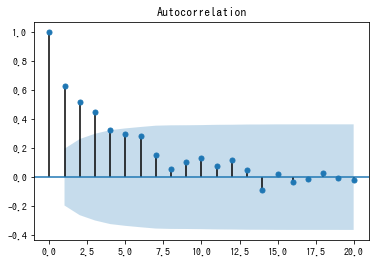

In [48]:
# 自己相関関数のグラフ
fig, ax = plt.subplots(1,1)
sm.graphics.tsa.plot_acf(merge['return_x_1'], lags=20, ax=ax)
plt.show()

In [49]:
help(sm.tsa.stattools.pacf)

Help on function pacf in module statsmodels.tsa.stattools:

pacf(x, nlags=40, method='ywunbiased', alpha=None)
    Partial autocorrelation estimated
    
    Parameters
    ----------
    x : 1d array
        observations of time series for which pacf is calculated
    nlags : int
        largest lag for which pacf is returned
    method : {'ywunbiased', 'ywmle', 'ols'}
        specifies which method for the calculations to use:
    
        - yw or ywunbiased : yule walker with bias correction in denominator
          for acovf. Default.
        - ywm or ywmle : yule walker without bias correction
        - ols - regression of time series on lags of it and on constant
        - ld or ldunbiased : Levinson-Durbin recursion with bias correction
        - ldb or ldbiased : Levinson-Durbin recursion without bias correction
    alpha : float, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence 

In [54]:
# 偏自己相関, 計算方法によって値がずれる。教科書はywmを使っている模様
sm.tsa.stattools.pacf(merge['return_x_1'], nlags=20)

array([ 1.        ,  0.63735086,  0.2037123 ,  0.11605178, -0.06586605,
        0.06542388,  0.08595059, -0.15756835, -0.14504708,  0.14981222,
        0.17179333, -0.11947313,  0.04055989, -0.04930581, -0.24139893,
        0.17395822, -0.09466728,  0.131602  ,  0.06472684, -0.05183839,
        0.01385249])

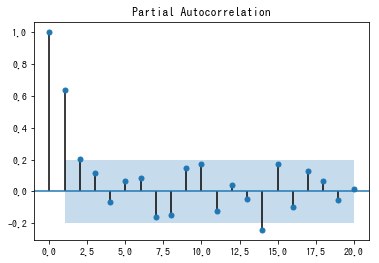

In [57]:
# 偏自己相関関数のプロット
fig, ax = plt.subplots(1,1)
sm.graphics.tsa.plot_pacf(merge['return_x_1'], lags=20, ax=ax)
plt.show()

In [61]:
# 自己回帰モデル
from statsmodels.tsa.ar_model import AR
help(AR)

Help on class AR in module statsmodels.tsa.ar_model:

class AR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  Autoregressive AR(p) model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The independent variable.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  
 |  Method resolution order:
 |      AR
 |      statsmodels.tsa.base.tsa_model.TimeSeriesModel
 |      statsmodels.base.model.LikelihoodModel
 |   

In [119]:
ar = AR(data['return_x']).fit(maxlag=1)

In [120]:
# よくわかりませんが、summaryは出力されない
# 係数
ar.params

const          0.113989
L1.return_x    0.632272
dtype: float64

In [121]:
sum(ar.resid**2) / 98

8.526329596858865

In [124]:
# ar(1)かar(0)かをaicで決定
ar = AR(data['return_y']).fit(maxlag=1)

In [125]:
ar.params

const          0.195068
L1.return_y    0.023429
dtype: float64

In [128]:
ar.tvalues

const          0.508312
L1.return_y    0.231343
dtype: float64

In [157]:
# シミュレーシン
def f(mu, x, phi):
    return mu + phi*x + np.random.normal(size=1)[0]

In [177]:
params = [1.2, -1.2, 1, -1, 0.5, -0.5]
series_list = []
for param in params:
    series = [0]
    x = 0
    for i in range(100):
        x = f(mu=0, x=x, phi=param)
        series.append(x)
    series_list.append(series)
df = pd.DataFrame(np.array(series_list).T)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9997c514a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9997bbb908>]], dtype=object)

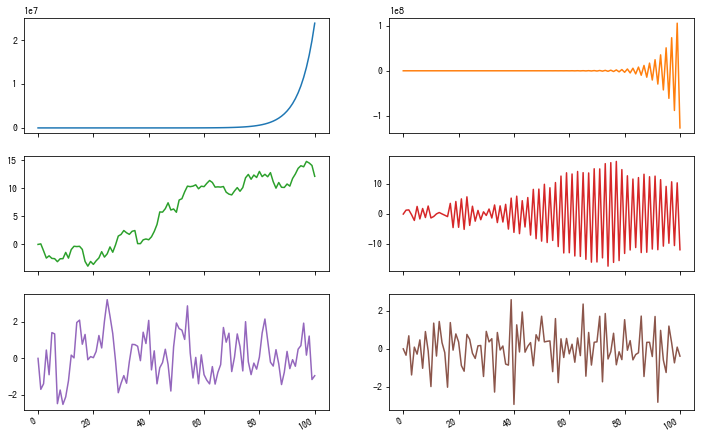

In [183]:
df.plot(kind='line', subplots=True, layout=(3,2), figsize=(12,8), legend=False)

In [224]:
# Dickey-Fuller検定
# データのインポート
a = robjects.r['price4']
data = pd.DataFrame(np.array(a).T, columns=a.colnames)
# Dickey-Fuller検定
# 帰無仮説はデータ系列に単位根が存在する。
adf, pvalue, usedlag, nobs, critical_values, icbest = sm.tsa.stattools.adfuller(data['x7272'])
print('pavalue:{}'.format(pvalue))

pavalue:0.8698267280984641


In [230]:
# おまけ
# 定常過程でテスト,結果は棄却されるので単位根は存在しない。
sm.tsa.stattools.adfuller(df[4])

(-5.1207228559145985,
 1.2734463737985407e-05,
 4,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 254.025903706566)

In [234]:
# なんとなく第一種の過誤をほんとに起こすのかどうかを見てみる。
for i in range(100):
    x = 0
    y = [0]
    for j in range(100):
        x = f(mu=0, x=x, phi=1.0)
        y.append(x)
    result = sm.tsa.stattools.adfuller(y)
    print('pvalue:{}'.format(result[1]))

pvalue:0.6801202782257602
pvalue:0.34989279989339966
pvalue:0.9529852478948493
pvalue:0.2274304024610957
pvalue:0.9689748662048892
pvalue:0.5688559586381441
pvalue:0.9494901799085367
pvalue:0.8417868857927915
pvalue:0.29773327631289925
pvalue:0.8560485980461545
pvalue:0.129298855636104
pvalue:0.3386646727130659
pvalue:0.34485187193471534
pvalue:0.47073397407210044
pvalue:0.3542764631887739
pvalue:0.8213498199997464
pvalue:0.6749913124933878
pvalue:0.7927785338742698
pvalue:0.9103585396103151
pvalue:0.39917545564527146
pvalue:0.20742296093507095
pvalue:0.7348195033958254
pvalue:0.9404288948483338
pvalue:0.15279031643006674
pvalue:0.4295581566127168
pvalue:0.6794976986335994
pvalue:0.012011466646136115
pvalue:0.1457342085437821
pvalue:0.9964151916996395
pvalue:0.24972540993288722
pvalue:0.5998889606524686
pvalue:0.6462371865498086
pvalue:0.7687698758221537
pvalue:0.19903869861946782
pvalue:0.5791563643824289
pvalue:0.48838300700475773
pvalue:0.38732456678030003
pvalue:0.25165145632144553

In [242]:
# 収益率にdickey-fuller検定
# 帰無仮説は棄却されるので、単位根は含まれない。
a = robjects.r['return4']
df = pd.DataFrame(np.array(a).T, columns=a.colnames)
results = sm.tsa.stattools.adfuller(df['x7272'])
print('pvalue:{}'.format(results[1]))

pvalue:1.0949785696011112e-20
